In [1]:
from pybaseball import statcast_pitcher;
from pybaseball import playerid_lookup;
from pybaseball import pitching_stats;
import os;
import pandas as pd;
import numpy as np;
import seaborn as sns;
import matplotlib.pyplot as plt;
import plotly.express as px;

In [131]:
playerid_lookup("bello","brayan")
##675911

,name_last,name_first,key_mlbam,key_retro,key_bbref,key_fangraphs,mlb_played_first,mlb_played_last
0,bello,brayan,678394,bellb002,bellobr01,23920,2022.0,2024.0


In [142]:
pitcher_data = statcast_pitcher('2024-03-21', '2024-03-30', player_id = 808967)


In [143]:
pitcher_data['description_count'] = 0
pitcher_data['did_batters_swing'] = 0
pitcher_data['did_batters_whiff'] = 0

In [144]:
df = pitcher_data.loc[:,['pitch_type','description','description_count']].groupby(['pitch_type','description'], as_index=False).count()

In [145]:
df

,pitch_type,description,description_count
0,CU,ball,8
1,CU,blocked_ball,2
2,CU,called_strike,9
3,CU,foul,2
4,CU,hit_into_play,2
5,CU,swinging_strike,5
6,FC,ball,5
7,FC,foul,3
8,FC,hit_into_play,2
9,FC,swinging_strike,3


In [146]:
swings = ['foul','foul_tip','hit_into_play','swinging_strike','swinging_strike_blocked']
whiffs = ['swinging_strike','swinging_strike_blocked']
pitch_types = ['CU','FC','FF','FS']

In [147]:
##whiff% = whiffs/(whiffs+contact+foul), cu bien, FC bien, ff (fastball) mal, fs (split) bien  
df_swings = df.loc[((df['description'].isin(swings))), ['pitch_type', 'description_count']].groupby('pitch_type').sum()
df_swings = df_swings.rename(columns={'description_count':'swings'})
df_swings

,swings
pitch_type,
CU,9
FC,8
FF,21
FS,10


In [148]:
##whiff% = whiffs/(whiffs+contact+foul), cu bien, FC bien, ff (fastball) mal, fs (split) bien  
df_whiffs = df.loc[((df['description'].isin(whiffs))), ['pitch_type', 'description_count']].groupby('pitch_type').sum()
df_whiffs = df_whiffs.rename(columns={'description_count':'whiffs'})
df_whiffs

,whiffs
pitch_type,
CU,5
FC,3
FF,1
FS,4


In [149]:
df_whiffs_rate = df_swings.merge(df_whiffs, on=['pitch_type'])
df_whiffs_rate['Whiff%'] = 0
df_whiffs_rate['Whiff%'] = round((df_whiffs_rate["whiffs"]/df_whiffs_rate["swings"]*100),1)
df_whiffs_rate.reset_index(inplace=True) 
df_whiffs_rate

,pitch_type,swings,whiffs,Whiff%
0,CU,9,5,55.6
1,FC,8,3,37.5
2,FF,21,1,4.8
3,FS,10,4,40.0


In [177]:
df_whiffs_rate.dtypes

pitch_type     object
swings          int64
whiffs          int64
Whiff%        float64
dtype: object

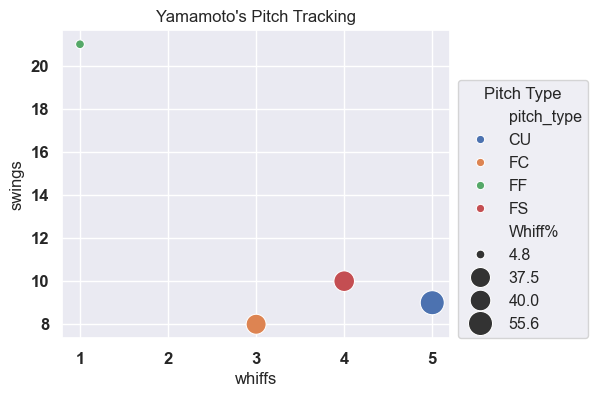

In [220]:
plt.figure(figsize=(5,4),)
plt_data = sns.scatterplot(data=df_whiffs_rate, x=df_whiffs_rate["whiffs"], y="swings", hue='pitch_type', size='Whiff%',
                sizes=(40, 300), legend="full")
plt_data.set_title("Yamamoto's Pitch Tracking")
plt.xticks(fontsize=12, fontweight='bold')
plt.yticks(fontsize=12, fontweight='bold')
plt.legend(title='Pitch Type', loc=(1.02,0), prop={'size': 11.5})
